### LEAST SQUARES PROBLEM ###
Write a program to solve the LS problem using SVD and compare the results with the QR factorization

In [ ]:
import numpy as np
import scipy
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Data Science UB/Numerical Linear Algebra/dades_regressio.csv' #first dataset
#first matrix A and vector b from dataset 1
A = np.genfromtxt(file_path, delimiter=',')
b=A[:,-1]
A=A[:,:-1] #we remove the last column

#There's an error in A: column 0 and column 1 are both [1,....,1] which is not the form of Vandermonde matrix
#We then discard the first column so that it is of the form [1,...,1], [x_0,....,x_m], [x_0^2,...,x_m^2]...

A=A[:,1:]
m=A.shape[0]
n=A.shape[1]


#this is the function for the QR factorization and solution
def solQR(A,b,m,n):
  Q, R = scipy.linalg.qr(A, overwrite_a=False, pivoting=False)
  #here we have our Q,R such that A=QR. Extract the Q1 from the Q
  Q1=Q[:,:n]
  Q2=Q[:,n:m]
  R1=R[:n,:n]
  x_qr=scipy.linalg.solve_triangular(R1,Q.T.dot(b)[:n],lower=False)
  res_qr=np.linalg.norm((Q.T.dot(b))[n:m])
  k2_qr=np.linalg.cond(R1)
  return x_qr, res_qr, k2_qr

def interpolate(x, coefficients):
  result = 0
  for i, coeff in enumerate(coefficients):
      result += coeff * (x ** i)
  return result

def createpolymatrix(x,n): #here we create the vandermonde matrix
  mat=np.zeros((len(x),n+1))
  for i in range(n+1):
    mat[:,i]=x**i
  return mat

def solSVD(A,b,n):
  U,S,V=scipy.linalg.svd(A)
  #we have now to solve SV^Tx=U^tb
  x_svd=scipy.linalg.solve(np.diag(S).dot(V),(U[:,:n]).T.dot(b))
  return x_svd




(15, 10)

We are ready to compute the solution in the QR case and check the results

In [ ]:
x_qr, res_qr, k2_qr=solQR(A,b,m,n)

In [ ]:
print("The solution is", x_qr)
print("The residual error is", res_qr)

The solution is [ 1.66061275e+01 -1.88268350e+03  2.99498591e+04 -2.12104358e+05
  8.37034713e+05 -2.00324191e+06  2.97903439e+06 -2.69206452e+06
  1.35366101e+06 -2.90442987e+05]
The residual error is 1.1495978959686812


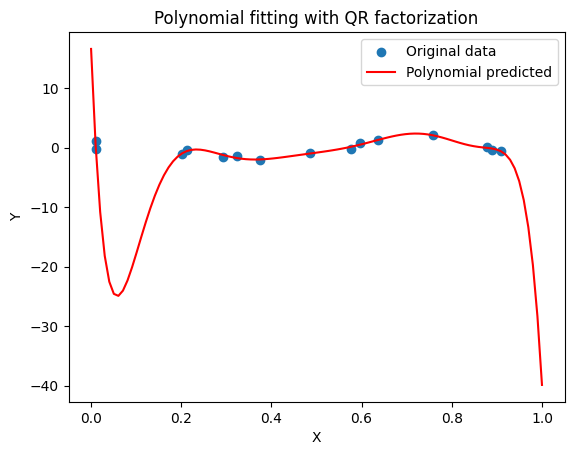

In [ ]:
x_plot = np.linspace(0, 1, 100)
y_plot = np.array([interpolate(x, x_qr) for x in x_plot])

# Grafico dei risultati
plt.scatter(x_points, b, label='Original data')
plt.plot(x_plot, y_plot, label='Polynomial predicted', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Polynomial fitting with QR factorization')
plt.show()

Let us now apply SVD to solve the same problem

In [ ]:
x_svd=solSVD(A,b,n)

In [ ]:
print(x_svd) #The solution coincides with the qr one

[ 1.66061276e+01 -1.88268350e+03  2.99498592e+04 -2.12104358e+05
  8.37034713e+05 -2.00324191e+06  2.97903439e+06 -2.69206453e+06
  1.35366101e+06 -2.90442987e+05]


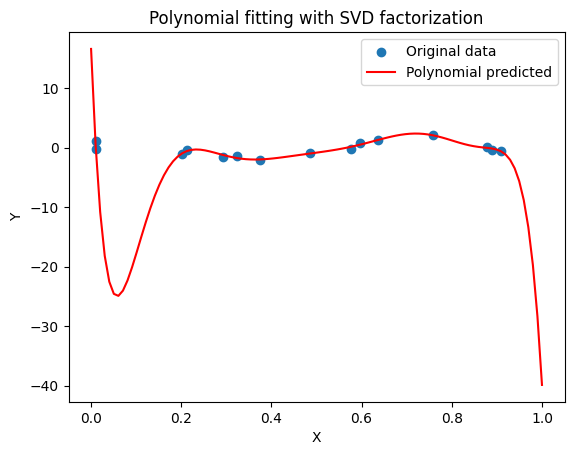

In [ ]:
y_plot = np.array([interpolate(x, x_svd) for x in x_plot])

# Grafico dei risultati
plt.scatter(x_points, b, label='Original data')
plt.plot(x_plot, y_plot, label='Polynomial predicted', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Polynomial fitting with SVD factorization')
plt.show()

Let us apply the functions for the dataset 2

In [ ]:
file_path_2 = '/content/drive/My Drive/Data Science UB/Numerical Linear Algebra/dade.csv' #second dataset
data=np.genfromtxt(file_path_2, delimiter=' ') #I have a problem in reading this files and it is (500,4) so I have to read the first and last column for the exercise

In [ ]:
x=data[:,0]
y=data[:,-1]
#we already now that the polynomial fitting this points has degree 2
deg=2
M=createpolymatrix(x,deg)
#now we apply svd and qr to M and compare the results
x2_qr,res2_qr,_=solQR(M,y,M.shape[0],M.shape[1])
x2_svd=solSVD(M,y,M.shape[1])

In [ ]:
print('The solution with QR is', x2_qr)
print('The solution with SVD is', x2_svd)

The solution with QR is [0.20000039 1.31085632 0.98928421]
The solution with SVD is [0.20000039 1.31085632 0.98928421]


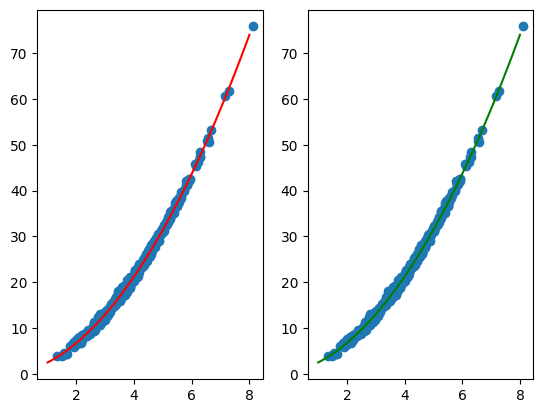

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(x,y,marker='o')
x_points=np.linspace(1, 8, 100)
pred_qr=interpolate(x_points,x2_qr)
plt.plot(x_points,pred_qr,color='r')

plt.subplot(1,2,2)
plt.scatter(x,y,marker='o')
pred_svd=interpolate(x_points,x2_svd)
plt.plot(x_points,pred_svd,color='g')